In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("/content/swedish_car_insurance.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


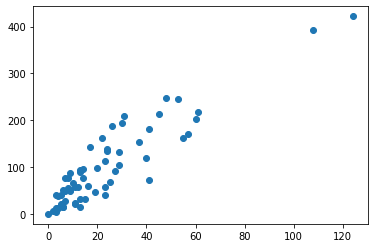

In [ ]:
plt.scatter(df['X'],df['Y'])

### Null Values

In [ ]:
df.isnull().sum()

X    0
Y    0
dtype: int64

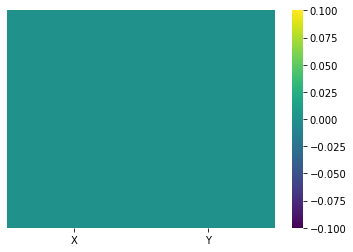

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
X=df.iloc[:,:-1]
X

,X
0,108
1,19
2,13
3,124
4,40
...,...
58,9
59,31
60,14
61,53


In [ ]:
Y=df.iloc[:,1:]
Y

,Y
0,392.5
1,46.2
2,15.7
3,422.2
4,119.4
...,...
58,87.4
59,209.8
60,95.5
61,244.6


### Data Split


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=LR.predict(X_test)
y_pred

array([[226.37811737],
       [384.40280399],
       [ 64.99120337],
       [ 51.54229387],
       [ 31.36892962],
       [ 48.18006649],
       [ 58.26674862],
       [ 44.81783912],
       [ 64.99120337],
       [ 41.45561174],
       [ 85.16456762],
       [ 21.28224749],
       [ 68.35343074],
       [ 88.52679499],
       [ 54.90452124],
       [ 38.09338437],
       [ 98.61347712],
       [125.51129612],
       [ 34.73115699]])

In [ ]:
score=r2_score(Y_test,y_pred)
score

0.8817403678073779

# MultiRegression

In [ ]:
df=pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


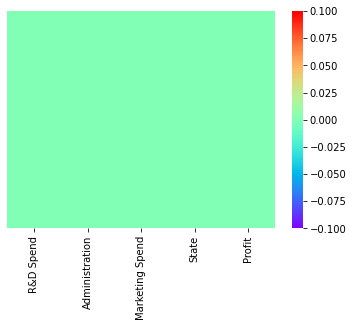

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='rainbow')

In [ ]:
X=df.iloc[:,:4]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
Y=df.iloc[:,4:5]
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# One Hot encoding

In [ ]:
state=pd.get_dummies(X['State'])
state.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
state.columns=['California','Florida','New York']

In [ ]:
X.drop('State',axis=1,inplace=True)

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [ ]:
X=pd.concat([X,state],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(X_train,Y_train)
y_pred=LR.predict(X_test)
score=r2_score(Y_test,y_pred)
score

0.9796796125083208